In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("2014_Financial_Data.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df = df.interpolate()
df_updated = df.interpolate()

In [5]:
columnList=list(df.columns)

In [6]:
usedColumnList=['Total current assets','Total current liabilities','Working Capital','Total assets','Cash and cash equivalents',
                'Net Income','returnOnEquity','Receivables Turnover','EBIT','Total debt','Total shareholders equity',
               'Interest Expense','Total liabilities','Total shareholders equity','Long-term debt','Total liabilities','Revenue','Net Profit Margin',
               'Investment purchases and sales','Investment purchases and sales']

for item in columnList:
    if(item not in usedColumnList):
        #df = df.drop(columns=item)
        del df_updated[item]
    else:
        print(item,"exists in the list")

Revenue exists in the list
Interest Expense exists in the list
Net Income exists in the list
EBIT exists in the list
Net Profit Margin exists in the list
Cash and cash equivalents exists in the list
Total current assets exists in the list
Total assets exists in the list
Total current liabilities exists in the list
Long-term debt exists in the list
Total debt exists in the list
Total liabilities exists in the list
Total shareholders equity exists in the list
Investment purchases and sales exists in the list
returnOnEquity exists in the list
Working Capital exists in the list
Receivables Turnover exists in the list


In [7]:
#Altmans Z-Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E
'''
A = working capital / total assets
B = retained earnings / total assets
C = earnings before interest and tax / total assets
D = market value of equity / total liabilities
E = sales / total assets
'''

score = 1.2*(df["Working Capital"]/df["Total assets"]) 
+ 1.4*(df["Retained earnings (deficit)"]/df["Total assets"])
+ 3.3*(df["EBIT"]/df["Total assets"])
+ 0.6*(1/df["Debt to Equity"])
+ 1.0*(df["assetTurnover"])

df_updated["PD"] = 1/(1+np.exp(-score))

In [8]:

df_indictors =pd.DataFrame()
df_indictors["indicator01"] = df['Total current assets']/df['Total current liabilities']
df_indictors["indicator02"] = df['Working Capital']/df['Total assets']
df_indictors["indicator03"] = df['Total current liabilities']/df['Total assets']
df_indictors["indicator04"] = (df['Revenue']*df['Net Profit Margin'])/df['Investment purchases and sales']
df_indictors["indicator05"] = df['Cash and cash equivalents']/df['Total current liabilities']
df_indictors["indicator06"] = (df['Total liabilities'] - df['Cash and cash equivalents']) / df['Investment purchases and sales']
df_indictors["indicator07"] = df['Net Income']/ df['returnOnEquity']
df_indictors["indicator08"] = df['Net Income'] / df['Receivables Turnover']
df_indictors["indicator09"] = df['EBIT'] / df['Total assets']
df_indictors["indicator10"] = df['Total debt'] / df['Total shareholders equity']
df_indictors["indicator11"] = df['Total debt']/ df['Total assets']
df_indictors["indicator12"] = df['EBIT'] / df['Interest Expense']
df_indictors["indicator13"] = df['Total liabilities'] / df['Total assets']
df_indictors["indicator14"] = df['Total shareholders equity'] / df['Total assets']
df_indictors["indicator15"] = df['Long-term debt'] / df['Total assets']
#df_indictors["indicator16"] = df['Total debt'] / df['Total assets']
df_indictors["indicator17"] = df['Total debt'] / df['Total current assets']
df_indictors["indicator18"] = df['Total debt'] / (df['Total assets']-df['Total debt'])
df_indictors["indicator19"] = df['Total debt']  / df['Total liabilities']
df_indictors["indicator20"] = df['EBIT'] / df['Total assets']
df_indictors["indicator21"] =(df['Total current assets'] - df['Average Inventory'] - df['Receivables']) / df['Total current liabilities']
#df_indictors["indicator22"] = total liabilities / ((profit on operating activities + depreciation) * (12/365))

In [9]:
df_indictors = df_indictors[np.isfinite(df_indictors).all(1)]
score = 1.2*(df["Working Capital"]/df["Total assets"]) 
+ 1.4*(df["Retained earnings (deficit)"]/df["Total assets"])
+ 3.3*(df["EBIT"]/df["Total assets"])
+ 0.6*(1/df["Debt to Equity"])
+ 1.0*(df["assetTurnover"])

df_indictors["PD"] = 1/(1+np.exp(-score))

df_indictors.loc[df_indictors['PD'] >0.5, 'class'] = '1' 
df_indictors.loc[df_indictors['PD'] <=0.5, 'class'] = '0'
df_indictors

,indicator01,indicator02,indicator03,indicator04,indicator05,indicator06,indicator07,indicator08,indicator09,indicator10,...,indicator13,indicator14,indicator15,indicator17,indicator18,indicator19,indicator20,indicator21,PD,class
0,0.937467,-0.014619,0.233776,-14.464294,0.253751,-81.654658,6.996995e+10,1.008891e+09,0.105382,0.506131,...,0.514952,0.485048,0.137323,1.120189,0.325377,0.476740,0.105382,0.545484,0.495614,0
1,1.301829,1.120027,0.599095,-0.639202,0.471789,-7.183715,4.123337e+08,2.654496e+06,0.068525,1.509318,...,0.840832,0.150677,0.227419,0.291592,0.294362,0.270469,0.068525,-2.435778,0.793152,1
3,1.708956,0.255969,0.361051,6.078456,0.058388,216.551257,-2.113678e+09,9.177426e+06,0.097167,-2.723725,...,1.304354,-0.304354,0.821897,1.343518,4.847190,0.635546,0.097167,0.104376,0.576193,1
4,0.810086,-0.044501,0.234320,62.286288,0.159915,487.675768,6.534384e+09,1.492352e+08,0.130050,1.344463,...,0.654817,0.282333,0.277525,1.999727,0.611829,0.579684,0.130050,0.250290,0.486653,0
5,1.024616,0.010572,0.429477,-258.272793,0.111302,-1541.655172,-1.262936e+10,3.674660e+08,0.330861,-2.332330,...,1.318385,-0.358911,0.765311,1.902286,5.138695,0.634943,0.330861,0.149616,0.503172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,1.182777,0.100211,0.548268,-1.013447,0.275521,-7.174277,2.046512e+07,4.691135e+05,0.100334,0.003274,...,0.575994,0.422499,0.000888,0.002133,0.001385,0.002401,0.100334,0.376125,0.530027,1
3781,2.928335,0.335052,0.173752,-11.242736,1.021930,7.912886,7.700621e+07,-1.417497e+06,-0.078593,0.085714,...,0.221629,0.778371,0.031848,0.131126,0.071487,0.301031,-0.078593,0.507126,0.599183,1
3787,14.844950,0.408659,0.029517,7.206332,4.264905,2.979525,1.885684e+08,-5.726764e+06,-0.224826,0.000000,...,0.032559,0.967441,0.000000,0.000000,0.000000,0.000000,-0.224826,6.637233,0.620198,1
3792,2.581006,0.510551,0.322928,-59.595954,1.149237,11.732323,1.490149e+07,-2.517335e+06,-0.428806,0.000000,...,0.455933,0.544067,0.000000,0.000000,0.000000,0.000000,-0.428806,1.637196,0.648548,1


In [10]:
import matplotlib.pyplot as plt 

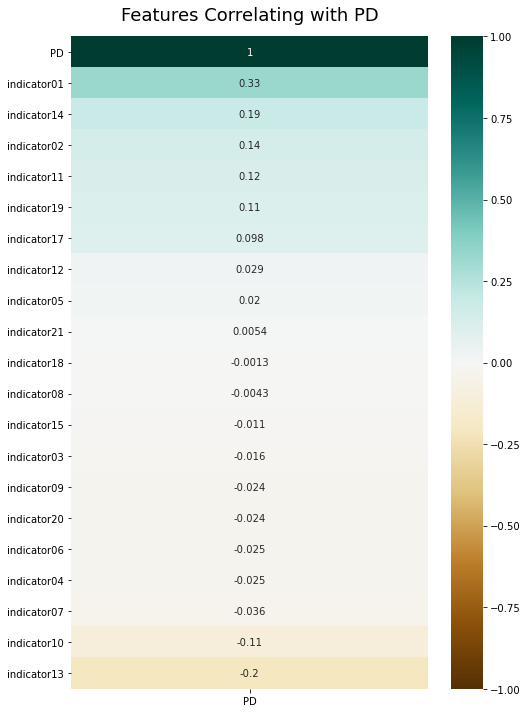

In [11]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df_indictors.corr()[['PD']].sort_values(by='PD', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with PD', fontdict={'fontsize':18}, pad=16);

In [12]:
from sklearn.model_selection import train_test_split

Y = df_indictors["class"]
X = df_indictors.drop(["class","PD"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_scaler = StandardScaler().fit(X_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
features_names = df_indictors.columns

In [19]:
sorted(zip(rf.feature_importances_, features_names), reverse=True) 

[(0.48364666431786635, 'indicator02'),
 (0.28456820760496504, 'indicator01'),
 (0.046307525824469856, 'indicator21'),
 (0.03237710499189865, 'indicator17'),
 (0.029855084320714168, 'indicator05'),
 (0.015558644320547458, 'indicator03'),
 (0.012463949227678496, 'indicator19'),
 (0.010388177612911982, 'indicator14'),
 (0.010387975667114954, 'indicator07'),
 (0.009738672546546668, 'indicator10'),
 (0.007956472956269571, 'indicator18'),
 (0.007800543102756154, 'indicator11'),
 (0.007679964391082685, 'indicator13'),
 (0.007472077187249044, 'indicator12'),
 (0.006202791402284681, 'indicator15'),
 (0.006096875934918427, 'indicator08'),
 (0.006016923936856048, 'indicator09'),
 (0.005688880649975775, 'indicator20'),
 (0.005074856014717522, 'indicator04'),
 (0.004718607989176601, 'indicator06')]

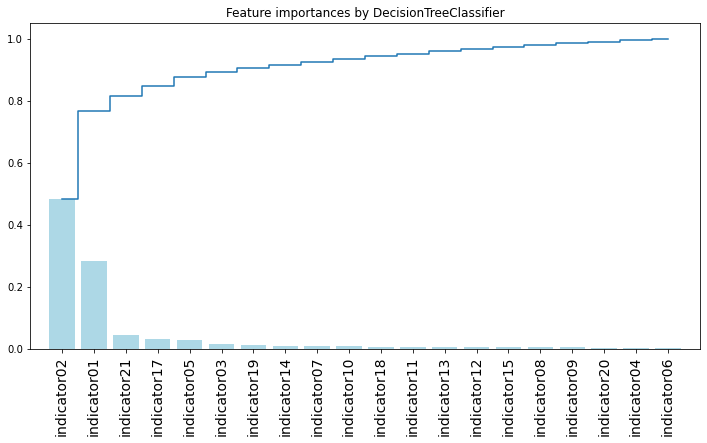

In [20]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [22]:
#Make my predictions
y_prediction = rf.predict(X_test)
y_probability = rf.predict_proba(X_test)
y_probability[0][1]

0.87

In [23]:
print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       1.00      0.54      0.70        63
     default       0.92      1.00      0.96       344

    accuracy                           0.93       407
   macro avg       0.96      0.77      0.83       407
weighted avg       0.93      0.93      0.92       407



In [24]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    

Confusion matrix, without normalization
[[ 34  29]
 [  0 344]]


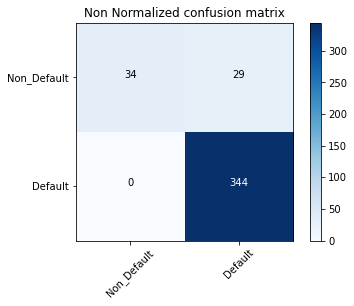

In [26]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default', 'Default'], normalize=False,
                      title='Non Normalized confusion matrix')

Normalized confusion matrix
[[0.53968254 0.46031746]
 [0.         1.        ]]


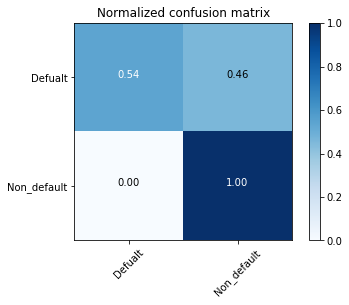

In [27]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')

In [34]:
import pickle
with open('probability_of_default_model.pkl', 'wb') as file:  
    pickle.dump(rf, file)

with open('scaler.pkl', 'wb') as file:  
    pickle.dump(rf, file)
    
#filename = 'probability_of_default_model.sav'
#pickle.dump(rf, open(filename, 'wb'))

In [35]:
with open("probability_of_default_model.pkl", 'rb') as file:  
    PD_Model = pickle.load(file)
    
with open("scaler.pkl", 'rb') as file:  
    scaler = pickle.load(file)

In [36]:
PD_Model

RandomForestClassifier(n_estimators=200)

In [44]:
pred=PD_Model.score(X_test_scaled,y_test)

1.0
